In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-dataset/breast-cancer.csv


In [4]:
 #Import Libraries
import pandas as pd
import numpy as np
import joblib
import random
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# **1. Introduction.**

Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases, and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.

The key challenges against it’s detection is how to classify tumors into malignant (cancerous) or benign(non cancerous). We ask you to complete the analysis of classifying these tumors using machine learning (with SVMs) and the Breast Cancer Wisconsin (Diagnostic) Dataset.



###  Objective: 
Understand the Dataset & cleanup (if required).
Build classification models to predict whether the cancer type is Malignant or Benign.
Also fine-tune the hyperparameters & compare the evaluation metrics of various classification algorithms.

### Dataset Description

The dataset contains 30 features, below I have listed only the first 10 and their descriptions:

id: ID number
diagnosis: The diagnosis of breast tissues (M = malignant, B = benign)
radius_mean: Mean of distances from center to points on the perimeter
texture_mean: Standard deviation of gray-scale values
perimeter_mean: Mean size of the core tumor
area_mean: Mean area of the tumor
smoothness_mean: Mean of local variation in radius lengths
compactness_mean: Mean of perimeter^2 / area - 1.0
concavity_mean: Mean of severity of concave portions of the contour
concave points_mean: Mean for number of concave portions of the contour

So basically using the 30 features, we're going to predict the cancer diagnosis. It has two possible values: M (malignant) and B (benign).


# 2. Data Exploration


In [5]:
# Import Libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Load the dataset
filepath = "/kaggle/input/breast-cancer-dataset/breast-cancer.csv"



df= pd.read_csv(filepath)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

#"Initial Data Overview:
print("Initial Data Overview:")
print(df.head())
print("\n"*3)
#Data Info
print(" DATA INFO")
print(df.info())



Initial Data Overview:
         id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302          1        17.99         10.38          122.80     1001.0   
1    842517          1        20.57         17.77          132.90     1326.0   
2  84300903          1        19.69         21.25          130.00     1203.0   
3  84348301          1        11.42         20.38           77.58      386.1   
4  84358402          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_wor

# A quick recap of what we've done above:

* We began by importing all the necessary libraries that we would need:

   *  "pandas" for data manipulation and analysis. You can see this from the line "df = pd.read_csv(filepath)". Where we read our our CSV file from the specified "filepath" and load its contents into  a dataframe(df, which you can think of as 2D matrix of our data).
   
   *  "RandomForestRegressor from sklearn" is used for building a regression model. We'll touch on this later.
   
   * "cross_val_score from sklearn" is used for evaluating the performance of a model using cross-validation. We will touch on this later on.
   
   
   
   
* We have touched on loading our dataset, we simply used pandas to read our CSV file and load it into a Dataframe.



* Next we printed out the first five rows of our dataset to get our intial overview of our dataset. We can use this to quickly inspect the Dataframe, which helps us better understand the structure of our data.



* Lastly, we deleved further into our dataset. Here we get a concise summary of the following:
 
    * The number of entries(Rows), which is 569
      
    * The number of columns, which is 32.
      
    * The column names and their data types (e.g., float64, int64, object).
      
    * The number of non-null values in each column, indicating that there are no missing values in any column.
 
 .

#  Exploratory Data Analysis (EDA)


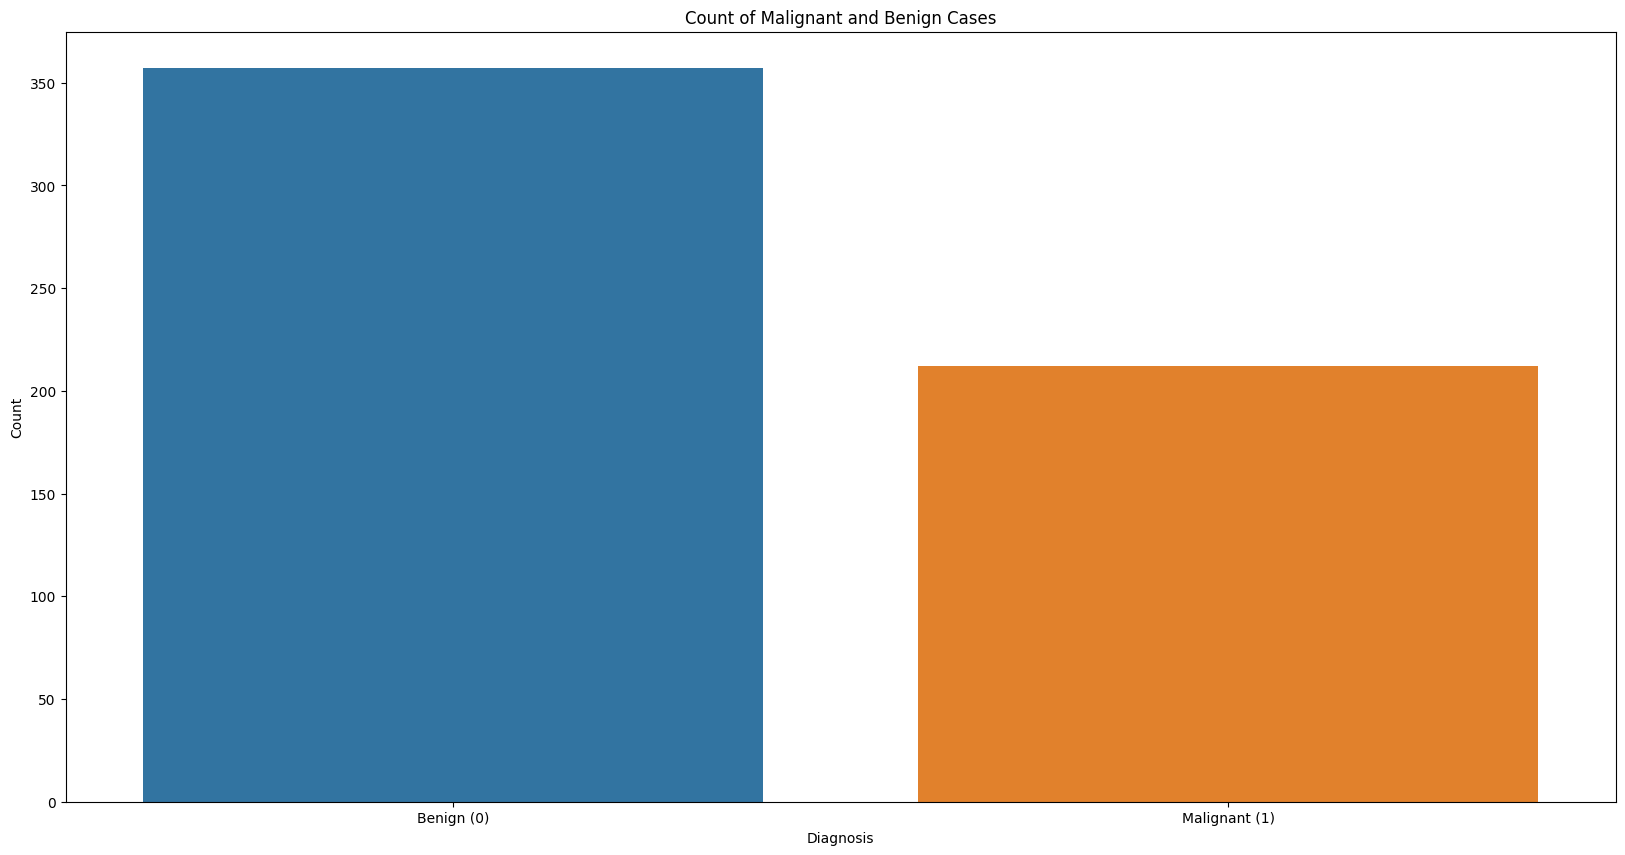

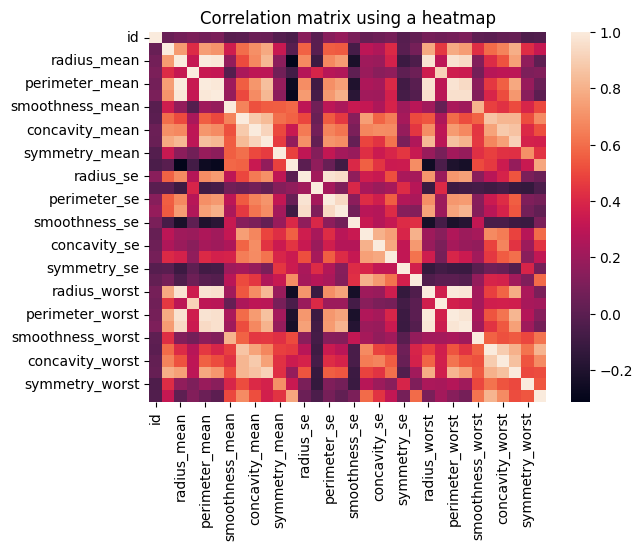

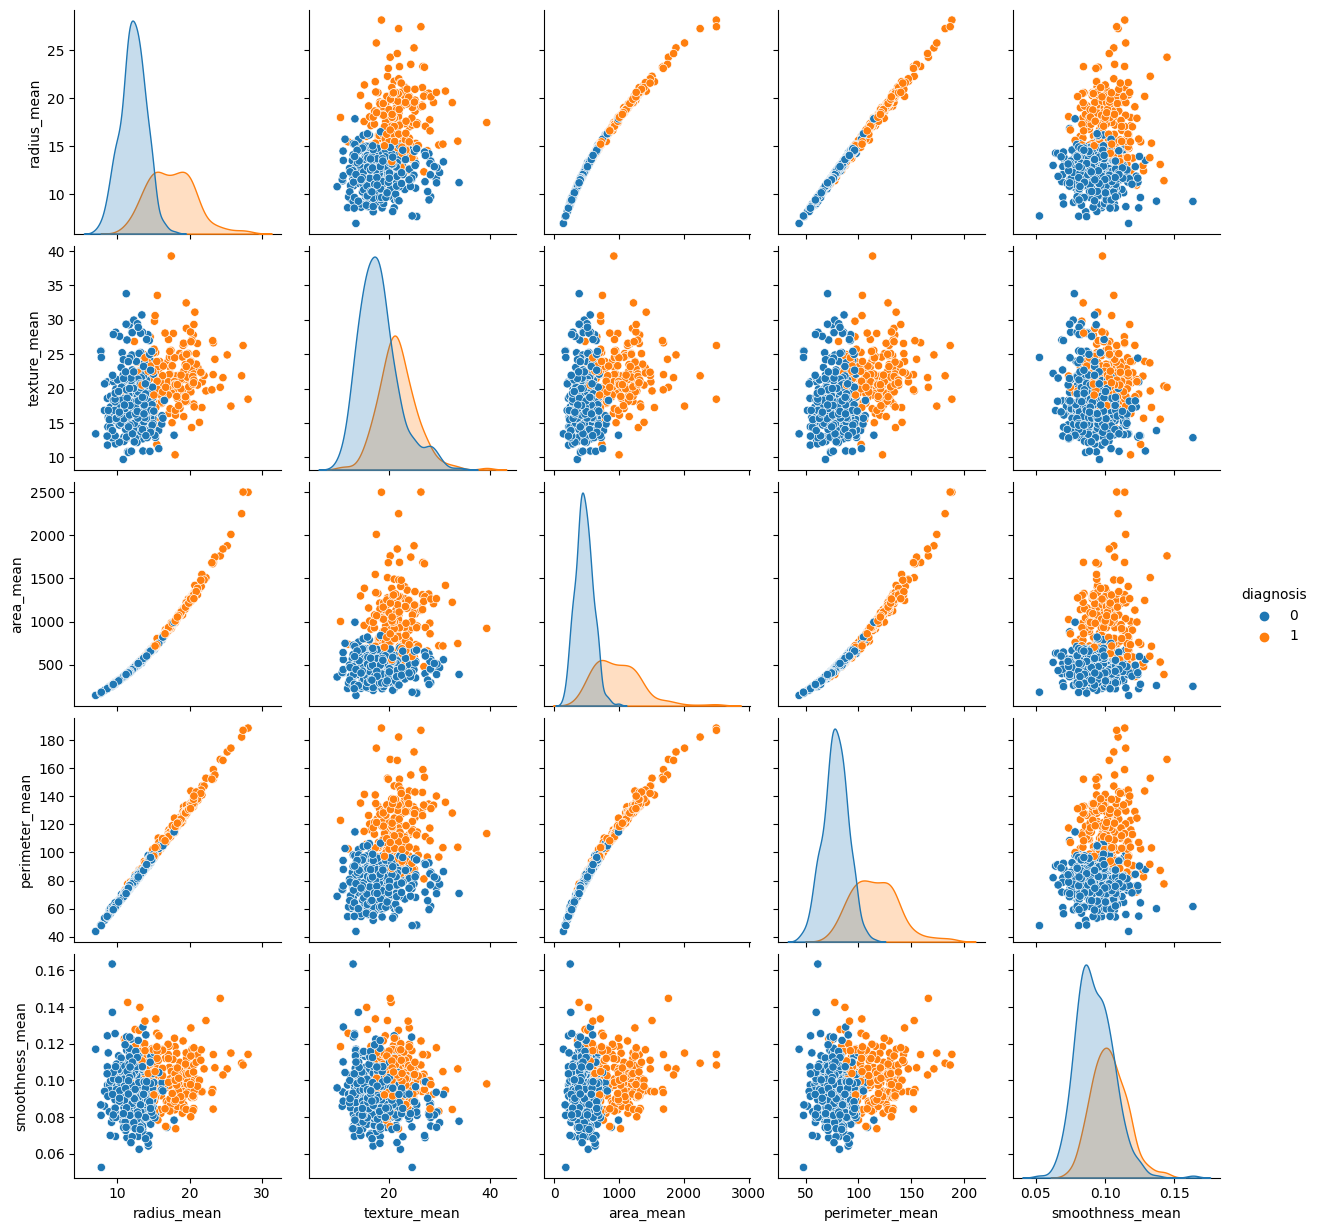

In [6]:
#Import Libraries

import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



# Count Plot: Here we display the number of malignant to Benign. 

plt.figure(figsize=(20, 10))
sns.countplot(x='diagnosis', data=df)
plt.title('Count of Malignant and Benign Cases')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Benign (0)', 'Malignant (1)'])
plt.show()
print("\n"*3)

#Correlation Matrix: We display the correlation matrix and use a heatmap to visualize it.

plt.title('Correlation matrix using a heatmap')
corr_matrix = df.corr()
sns.heatmap(corr_matrix)
print("\n"*3)

#Bivariate Analysis: We analyze the relationship between features and the target variable using pair plots, etc.

warnings.filterwarnings('ignore')
small_features = ['radius_mean', 'texture_mean', 'area_mean', 'perimeter_mean', 'smoothness_mean']
sns.pairplot(df, hue = 'diagnosis',vars = small_features)

plt.show()


# A quick recap of what we've done above:

* We began by plotting a bar grsph: Our analysis of it shows that the dataset is imbalanced and may require techniques such as oversampling or undersampling to improve the models ability to detect malignant cases.
* We then moved on to plotting thecorrelation marix: We found High similarities amoung similar features(radius_mean vs area_mean) the strong correlated values show that  tumor characteristics tend o be the same through either malignant or benign cases.
* Lastly we plotted our pair plots: These showed us the relatonship between several features.

.


#  Data Preprocessing



In [7]:
#Missing Values: We check for missing values and handle them appropriately.

df.replace([np.inf, -np.inf], np.nan, inplace=True)
print(df.isnull().sum())

#Feature Engineering: Convert categorical variables, if any, into numerical form.
#We touched on this when we converted our diagnosis feature into an integer.

df = df.drop(columns=['id'], errors='ignore')

#Scaling Features: Standardize/normalize the features for better model performance.

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


# 5. Model Building


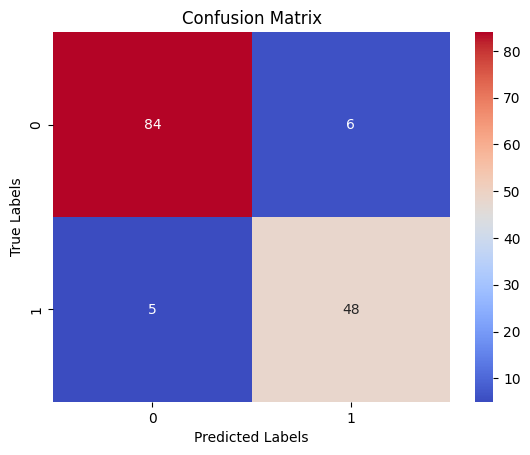

In [8]:
#Train-Test Split: Here we split the data into training and testing sets.

x = df.drop(columns=['diagnosis'])
Y = df['diagnosis']

train_x, test_x, train_Y, test_Y = train_test_split(x,Y,random_state = 0)

#Baseline Model: Here we build a baseline SVM (Support Vector Machine) model.

svc_model = SVC(class_weight='balanced')

#Model Training: Here we train the SVM model on the training data.

svc_model.fit(train_x,train_Y)

#Model Evaluation: Here we evaluate the model using appropriate metrics (accuracy, precision, recall, F1-score).

y_predict = svc_model.predict(test_x)

cm = confusion_matrix(test_Y,y_predict)

sns.heatmap(cm,annot = True,fmt='d',cmap='coolwarm')


plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [9]:
print(classification_report(test_Y,y_predict))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94        90
           1       0.89      0.91      0.90        53

    accuracy                           0.92       143
   macro avg       0.92      0.92      0.92       143
weighted avg       0.92      0.92      0.92       143



<Axes: xlabel='area_mean', ylabel='smoothness_mean'>

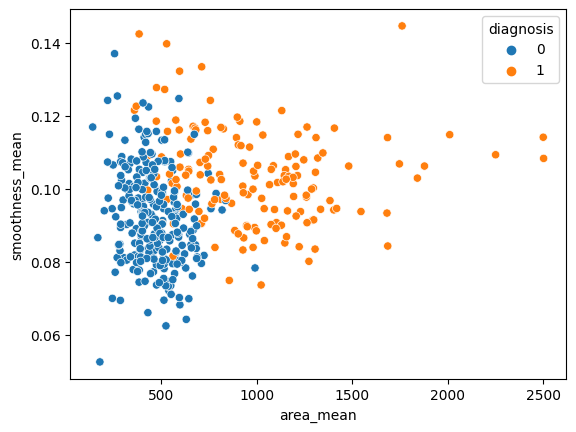

In [10]:
#Improving the model

min_train_x = train_x.min()

range_train_x = (train_x-min_train_x).max()

train_x_scaled = (train_x - min_train_x)/range_train_x

sns.scatterplot(x = train_x['area_mean'],y = train_x['smoothness_mean'], hue = train_Y)


In [11]:
train_x_scaled.shape


(426, 30)

<Axes: xlabel='area_mean', ylabel='smoothness_mean'>

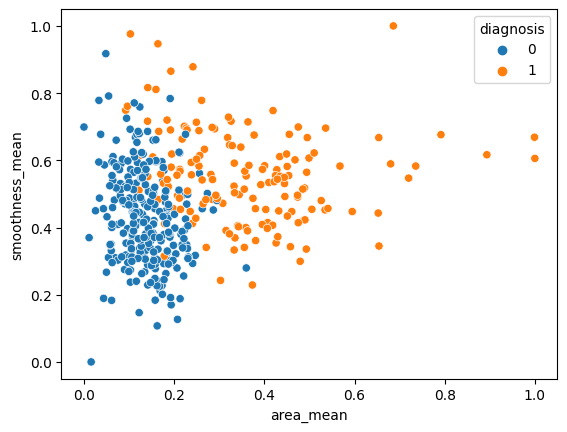

In [12]:
sns.scatterplot(x = train_x_scaled['area_mean'],y = train_x_scaled['smoothness_mean'], hue = train_Y)

In [13]:
svc_model.fit(train_x_scaled,train_Y)

SVC(class_weight='balanced')

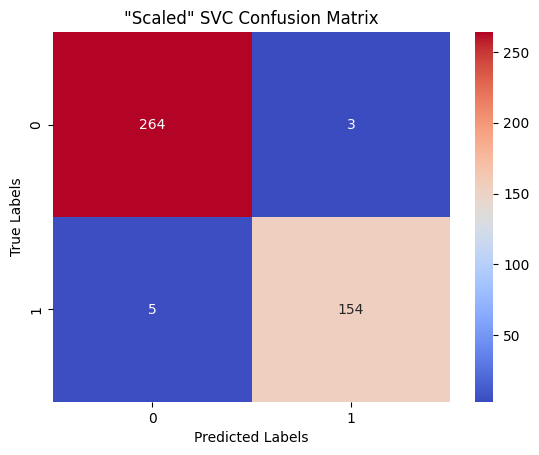

In [14]:
y_predict = svc_model.predict(train_x_scaled)

cm = confusion_matrix(train_Y,y_predict)

sns.heatmap(cm,annot = True, fmt = 'd', cmap = 'coolwarm')

plt.title('"Scaled" SVC Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [15]:
print(classification_report(train_Y,y_predict))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       267
           1       0.98      0.97      0.97       159

    accuracy                           0.98       426
   macro avg       0.98      0.98      0.98       426
weighted avg       0.98      0.98      0.98       426



# 6. Conclusion


### Summary of Findings: 


I used the SVM algorithm to predict whether an instance of a breast tumor is benign or malignant.The model achieved an accuracy of 98%.
It performed well in distinguishing between benign (class 0) and malignant (class 1) cases with F1-scores of 0.98 or higher across both classes.

The model performe extremelly well but due to the medical nature of the dataset
we stressed on the importance of having high accuracy but also low false negative (FN) predictions, as this would save lives.

### Future Work:

In terms of future work I will look at comparing the current model with the likes of KNN, LR, Navias Bayes and K-Means just to name a few.

# 7. References
Acknowledgements: 
This dataset has been referred from Kaggle.

# 8. Appendix

Code: Include any additional code or functions used in the analysis.

In [16]:
#Here is a "nicer" way of displaying the data frame

df.describe().T.style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.000000,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.000000
radius_mean,569.000000,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.110000
texture_mean,569.000000,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.280000
perimeter_mean,569.000000,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.500000
area_mean,569.000000,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.000000
smoothness_mean,569.000000,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.163400
compactness_mean,569.000000,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.345400
concavity_mean,569.000000,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.426800
concave points_mean,569.000000,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.201200
symmetry_mean,569.000000,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.304000
